In [1]:
import sys; sys.path.append("../../..")
import numpy as np
import matplotlib.pyplot as plt

from edge_detection import get_sobel_grad_2d
from helpers import plot_image, read_image

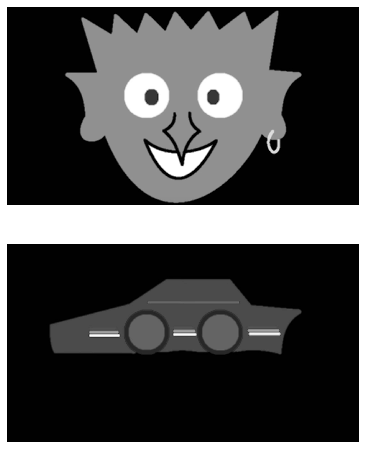

In [2]:
frizzy = read_image("../../../images/frizzy.png", convert_grayscale=True) / 255.
froomer = read_image("../../../images/froomer.png", convert_grayscale=True) / 255.

fig, ax = plt.subplots(2, 1, figsize=(14, 8))
plot_image(frizzy, ax[0], cmap="gray")
plot_image(froomer, ax[1], cmap="gray")

### Get Gradient of both images

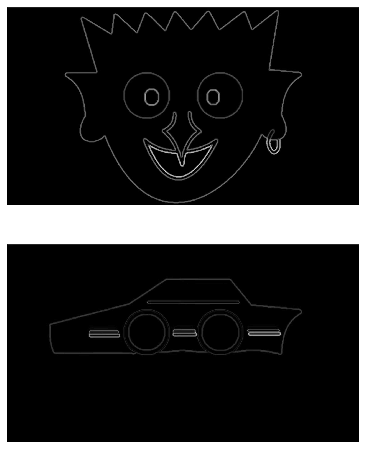

In [3]:
grad_frizzy, _ = get_sobel_grad_2d(frizzy)
grad_froomer, _ = get_sobel_grad_2d(froomer)
fig, ax = plt.subplots(2, 1, figsize=(14, 8))
plot_image(grad_frizzy, ax[0], cmap="gray")
plot_image(grad_froomer, ax[1], cmap="gray")

### Get Common edges

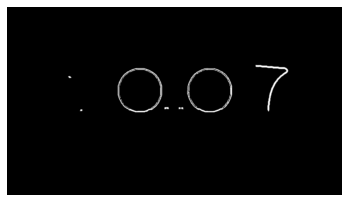

In [5]:
th = 0.01
common_edges = (((grad_frizzy > th) & (grad_froomer > th)) * 255).astype(np.uint8)
plot_image(common_edges, plt.gca(), cmap="gray", interpolation="bilinear")

### So the code is 007